<a href="https://colab.research.google.com/github/Saul-Ochoa/Classification-ML/blob/main/Brain%20Tumor/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Classification-ML/main/Brain%20Tumor/data.csv'

In [4]:
df=pd.read_csv(url,sep=',')
df.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor


In [5]:
df.isnull().sum()

Unnamed: 0    0
X53416        0
M83670        0
X90908        0
M97496        0
             ..
M13699.1      0
X54489        0
T55008        0
M10065.2      0
y             0
Length: 7466, dtype: int64

In [6]:
print(f'Total de vacios : ',df.isnull().sum().sum())

Total de vacios :  0


In [7]:
df.shape

(36, 7466)

In [8]:
df.columns

Index(['Unnamed: 0', 'X53416', 'M83670', 'X90908', 'M97496', 'X90908.1',
       'U37019', 'R48602', 'T96548', 'X64559',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7466)

In [9]:
df['y'].unique()

array(['tumor', 'Normal'], dtype=object)

**Label Encoder**

In [10]:
le=preprocessing.LabelEncoder()
df['y']=le.fit_transform(df['y'])

In [11]:
df['y'].unique()

array([1, 0])

In [12]:
for i in df.columns:
  for each in df[i].values:
    if each>1 or each < -1:
      df[i]=(df[i] - np.min(df[i]))/ (np.max(df[i]) - np.min(df[i]))
    else:
      pass

In [13]:
df['X53416'].values

array([0.30450379, 0.31964926, 0.30649661, 0.62375448, 0.23993623,
       0.28497409, 0.36628139, 0.13870068, 0.12594659, 0.46592268,
       0.32961339, 0.13351933, 0.46193703, 0.        , 0.13431646,
       0.13989637, 0.21044241, 0.30490235, 0.80031885, 1.        ,
       0.52530889, 0.46074133, 0.54444002, 0.23395775, 0.70665604,
       0.07612595, 0.52849741, 0.83937824, 0.72379434, 0.53328019,
       0.97807892, 0.47110403, 0.34196891, 0.78756477, 0.30370666,
       0.6464727 ])

In [14]:
for i in df.columns:
    for each in df[i].values:

        if each > 1 or each < -1:
            df[i] = (df[i] - np.min(df[i]))/(np.max(df[i]) - np.min(df[i]))
        else:
            pass

In [15]:
y=df['y']
X=df.drop(['y'],axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

## **Machine Learning (Classification)**

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### **Logistic Regression**

In [18]:
log_reg=LogisticRegression(random_state=0,max_iter=900)
log_reg.fit(X_train,y_train)
y_pred_log_reg=log_reg.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy Score :",round(accuracy_score(y_test,y_pred_log_reg)*100,2),"%")

print(classification_report(y_test, y_pred_log_reg))

Accuracy Score : 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [20]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_predictions = log_reg.predict(X_train)
test_predictions = log_reg.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 1.0


In [21]:
# Definir umbrales para determinar sobreajuste y subajuste
umbral_sobreajuste = 0.05  # Puedes ajustar este valor según tus necesidades
umbral_subajuste = 0.7  # Puedes ajustar este valor según tus necesidades

# Verificar sobreajuste y subajuste
if train_accuracy - test_accuracy > umbral_sobreajuste:
    print("El modelo podría estar experimentando sobreajuste.")
elif train_accuracy < umbral_subajuste and test_accuracy < umbral_subajuste:
    print("El modelo podría estar experimentando subajuste.")
else:
    print("El modelo parece tener un rendimiento razonable en ambos conjuntos.")


El modelo parece tener un rendimiento razonable en ambos conjuntos.


**GridSearchCV**

In [22]:
params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2','elasticnet']}
lr_model = LogisticRegression(random_state = 0)
lr_cv = GridSearchCV(lr_model,params,cv = 5).fit(X_train,y_train)
lr_cv.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [32]:
params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l2'],'solver':['lbfgs','liblinear','newton-cg','sag','saga']}
lr_model = LogisticRegression(random_state = 0)
lr_cv = GridSearchCV(lr_model,params,cv = 5).fit(X_train,y_train)
lr_cv.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [35]:
# Almacena los mejores parámetros en una variable
mejores_parametros = lr_cv.best_params_
print(mejores_parametros)
# Crea el modelo XGBClassifier utilizando los mejores parámetros
log_reg2 = LogisticRegression(**mejores_parametros)
log_reg2.fit(X_train,y_train)

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


LogisticRegression(C=0.01)

In [39]:
y_pred_log_reg=log_reg2.predict(X_test)

In [40]:
print("Accuracy Score :",round(accuracy_score(y_test,y_pred_log_reg)*100,2),"%")

print(classification_report(y_test, y_pred_log_reg))

Accuracy Score : 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [42]:
log_reg2.score(X_test,y_pred_log_reg)

1.0

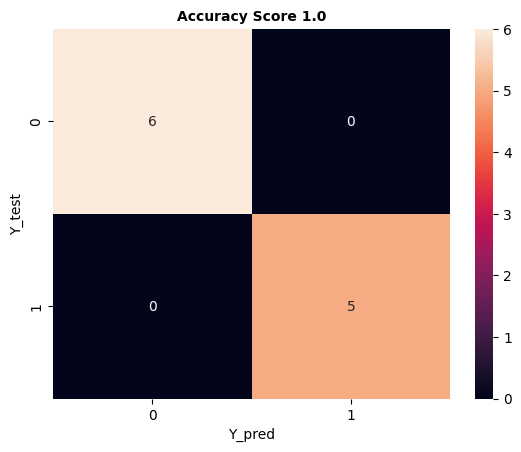

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred_log_reg),annot = True)
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.title(f"Accuracy Score {log_reg2.score(X_test,y_pred_log_reg)}",fontsize=10,weight='bold')
plt.show()

In [38]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_predictions = log_reg2.predict(X_train)
test_predictions = log_reg2.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')
# Definir umbrales para determinar sobreajuste y subajuste
umbral_sobreajuste = 0.05  # Puedes ajustar este valor según tus necesidades
umbral_subajuste = 0.7  # Puedes ajustar este valor según tus necesidades

# Verificar sobreajuste y subajuste
if train_accuracy - test_accuracy > umbral_sobreajuste:
    print("El modelo podría estar experimentando sobreajuste.")
elif train_accuracy < umbral_subajuste and test_accuracy < umbral_subajuste:
    print("El modelo podría estar experimentando subajuste.")
else:
    print("El modelo parece tener un rendimiento razonable en ambos conjuntos.")


Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 1.0
El modelo parece tener un rendimiento razonable en ambos conjuntos.


### **KNNN**

In [49]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
knn.score(X_test,y_test)

0.8181818181818182

In [70]:
params = {'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2],'metric':['str','callable','minkowski'],
          'metric_params':['dict',None],'n_jobs':[-1,1],'leaf_size':[10,20,30]}
lr_model= KNeighborsClassifier(n_neighbors = 2)
lr_cv = GridSearchCV(lr_model,params,cv = 5).fit(X_train,y_train)
lr_cv.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'p': 1,
 'weights': 'uniform'}

In [71]:
# Almacena los mejores parámetros en una variable
mejores_parametros = lr_cv.best_params_
print(mejores_parametros)
# Crea el modelo XGBClassifier utilizando los mejores parámetros
knn_2 =KNeighborsClassifier(n_neighbors = 2,**mejores_parametros)
knn_2.fit(X_train,y_train)

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'p': 1, 'weights': 'uniform'}


KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=2, p=1)

In [74]:
y_pred_knn=knn_2.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred_knn)*100,2),"%")
print(classification_report(y_test, y_pred_knn))

Accuracy Score : 81.82 %
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.60      0.75         5

    accuracy                           0.82        11
   macro avg       0.88      0.80      0.80        11
weighted avg       0.86      0.82      0.81        11



In [75]:
knn_2.score(X_test,y_pred_knn)

1.0

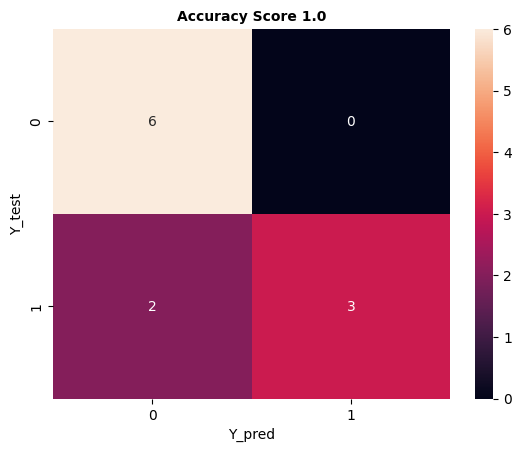

In [77]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot = True)
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.title(f"Accuracy Score {knn_2.score(X_test,y_pred_knn)}",fontsize=10,weight='bold')
plt.show()

In [78]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_predictions = knn_2.predict(X_train)
test_predictions = knn_2.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')
# Definir umbrales para determinar sobreajuste y subajuste
umbral_sobreajuste = 0.05  # Puedes ajustar este valor según tus necesidades
umbral_subajuste = 0.7  # Puedes ajustar este valor según tus necesidades

# Verificar sobreajuste y subajuste
if train_accuracy - test_accuracy > umbral_sobreajuste:
    print("El modelo podría estar experimentando sobreajuste.")
elif train_accuracy < umbral_subajuste and test_accuracy < umbral_subajuste:
    print("El modelo podría estar experimentando subajuste.")
else:
    print("El modelo parece tener un rendimiento razonable en ambos conjuntos.")

Precisión en el conjunto de entrenamiento: 0.84
Precisión en el conjunto de prueba: 0.8181818181818182
El modelo parece tener un rendimiento razonable en ambos conjuntos.
